Text(0.5, 1.0, 'Cz EEG signal')

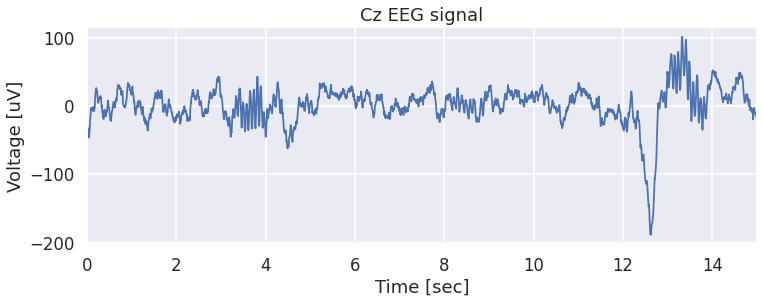

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import detrend
from mne.time_frequency import morlet

# Load the data
x = np.loadtxt('spindle-data.txt')
data = x
# Define sampling frequency and time vector
sf = 200.
times = np.arange(x.size) / sf

# Plot the signal
sns.set(context='talk')
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(times, x, lw=1.75)
ax.set_xlim(0, times[-1])
ax.set_xlabel('Time [sec]')
ax.set_ylabel('Voltage [uV]')
ax.set_title('Cz EEG signal')

[-28.05092049 -30.06139565 -33.50792313 ... -15.31790829 -14.26480198
 -15.50938225]
Multitaper Spectrogram Properties: 
     Spectral Resolution: 4.0Hz
     Window Length: 1.0s
     Window Step: 0.02s
     Time Half-Bandwidth Product: 2
     Number of Tapers: 3
     Frequency Range: 0-30Hz
     Detrend: constant


 Multitaper compute time: 0.16989955864846706 seconds


/home/data/vip24/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


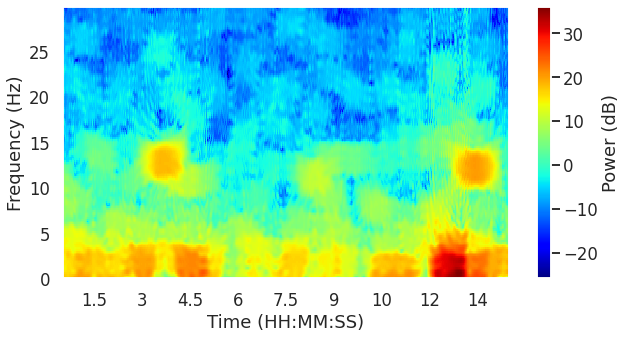

In [6]:
from multitaper_spectrogram_python import multitaper_spectrogram  # import multitaper_spectrogram function from the multitaper_spectrogram_python.py file
from scipy.signal import chirp  # import chirp generation function

# Set spectrogram params
fs = 200  # Sampling Frequency
frequency_range = [0, 30]  # Limit frequencies from 0 to 25 Hz
time_bandwidth = 2  # Set time-half bandwidth
num_tapers = 3  # Set number of tapers (optimal is time_bandwidth*2 - 1)
window_params = [1, 0.02]  # Window size is 4s with step size of 1s
min_nfft = 1024 # No minimum nfft
detrend_opt = 'constant'  # detrend each window by subtracting the average
multiprocess = True  # use multiprocessing
cpus = 10  # use 3 cores in multiprocessing
weighting = 'unity'  # weight each taper at 1
plot_on = True  # plot spectrogram
clim_scale = False # do not auto-scale colormap
verbose = True  # print extra info
xyflip = False  # do not transpose spect output matrix

print(data)
# Compute the multitaper spectrogram
spect, stimes, sfreqs = multitaper_spectrogram(data, fs, frequency_range, time_bandwidth, num_tapers, window_params, min_nfft, detrend_opt, multiprocess, cpus, weighting, plot_on, clim_scale, verbose, xyflip)